<b>This is a trial of the camera matrix using numpy. CAMERA MATRIX FOR PRESPECTIVE PROJECTION   </b> 

Wetting our hands with Numpy

In [306]:
import numpy as np
import math as math
a = np.matrix('1 2 3;4 5 6;7 8 9')
b = np.matrix('1 0 0; 0 1 0;0 0 1')
c = np.matrix('1;1;1')
result_Mat = np.matmul(a,c)
print(result_Mat.shape)
print(result_Mat)

(3, 1)
[[ 6]
 [15]
 [24]]


<B>Here is a Function that will convert 3D point into its Equivalant 2D projection using the famous camera transform </b>
<br>Equation fetched from here :  https://en.wikipedia.org/wiki/3D_projection#Mathematical_formula

In [449]:
def camera_transform(Input_Point):
    point_x, point_y, point_z = Input_Point[0], Input_Point[1], Input_Point[2] 
    Camera_x, Camera_y, Camera_z = 100, 100, 100
    theta_x, theta_y, theta_z = 0,0,0
    screen_x, screen_y, screen_z  = 50, 50, 50

    camera_pos = np.matrix([[Camera_x], [Camera_y], [Camera_z]])
    point_pos  = np.matrix([[point_x],  [point_y], [point_z]])
    screen_pos =  np.matrix([[screen_x], [screen_y], [screen_z]])

    Camera_rot_x = np.matrix([[1,0,0],[0, math.cos(theta_x), math.sin(theta_x)],[0, -math.sin(theta_x), math.cos(theta_x)]])
    Camera_rot_y = np.matrix([[math.cos(theta_y), 0, -math.sin(theta_y)], [0,1,0],[math.sin(theta_y),0, math.cos(theta_y)]])
    Camera_rot_z = np.matrix([[math.cos(theta_z), math.sin(theta_z),0],[-math.sin(theta_z), math.cos(theta_z), 0],[0,0,1]])

    #print(Camera_rot_x)
    #print(Camera_rot_y)
    #print(Camera_rot_z)

    #print(np.matmul(Camera_rot_x, Camera_rot_y, Camera_rot_z))

    diff_matrix = point_pos - camera_pos
    Vector_D = np.matmul(Camera_rot_x, Camera_rot_y)
    Vector_D = np.matmul(Vector_D, Camera_rot_z) 
    Vector_D = np.matmul(Vector_D, diff_matrix)
    #print(Vector_D)
    #print(Vector_D[0])
    #print(Vector_D[1])
    #print(Vector_D[2])

    Bx = (screen_pos[2] * Vector_D[0]/ Vector_D[2]) + screen_pos[0]
    By = (screen_pos[2] * Vector_D[1]/ Vector_D[2]) + screen_pos[1]
 
    return([Bx.item(), By.item()])


#checking the transformation of point 10,20,30 via our function
camera_transform ( Input_Point = [10,20,30] )
 

[114.28571428571429, 107.14285714285714]

<B>The following code is used to test the projection</b></br>At first we are trying to plot the vertices of a 10x10x10 code. the firt figure shows the individual points(i.e. the corners of the cube)[using Matplotlib's scatter function]; the second figure will show the points connecte via lines(using matplotlib's plot function)


16


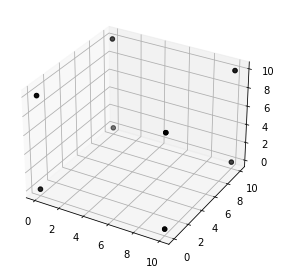

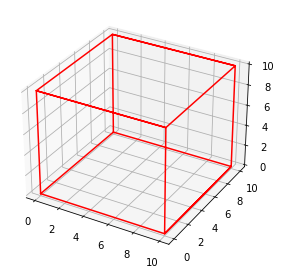

In [450]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

corners = np.array([[0,0,0],[0,10,0],[10,10,0],[10,0,0],[0,0,0],[0,0,10], [0,10,10], [10,10,10], [10,0,10],[0,0,10],[10,0,10,],[10,0,0],[10,10,0],[10,10,10],[0,10,10],[0,10,0]])

corners2 = np.array([[0,0,0],[0,10,0],[10,10,0],[10,0,0],[0,0,0],[0,0,10], [0,10,10], [10,10,10], [10,0,10],[10,10,10], 
[0,0,20],[0,10,20],[10,10,20],[10,0,20],[0,0,20],[0,0,30], [0,10,30], [10,10,30], [10,0,30],[10,10,30]]) 

print(corners.__len__())


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1, projection='3d') 
ax1.scatter(corners[:,0], corners[:,1], corners[:,2], color='black' )          
plt.show()

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(1,2,2, projection='3d')
ax2.plot(corners[:,0], corners[:,1], corners[:,2] , color='r')         
plt.show()  
 

In [309]:
#just trying to create a matrix via list compression
x = [x for x in range(1,4)]
y = [x for x in range(4,7)]
z = [x for x in range(7,10)]
 
m = np.matrix([x,y,z])
#print(m)

print(m[:,:2])

[[1 2]
 [4 5]
 [7 8]]


 
<B>THE INTERESTING BIT IS HERE </BR> Now creating a function to transform the input_points array as a whole and not individual set of points.
 </B>

In [465]:
def camera_transform_using_matrix(Input_Point):
    #point_x, point_y, point_z = Input_Point[:,0], Input_Point[:,1], Input_Point[:,2] 
    #point_x, point_y, point_z are no longer needed as we are now taking the whole array as input rather than individual points   
    

    Camera_x, Camera_y, Camera_z = 150, 150, 150
    theta_x, theta_y, theta_z = 40,50,120
    screen_x, screen_y, screen_z  = 350, 350, 350

    camera_pos = np.matrix([Camera_x, Camera_y, Camera_z])
    # point_pos  = np.matrix([[point_x],  [point_y], [point_z]])
    screen_pos =  np.matrix([screen_x,  screen_y, screen_z])

    Camera_rot_x = np.matrix([[1,0,0],[0, math.cos(theta_x), math.sin(theta_x)],[0, -math.sin(theta_x), math.cos(theta_x)]])
    Camera_rot_y = np.matrix([[math.cos(theta_y), 0, -math.sin(theta_y)], [0,1,0],[math.sin(theta_y),0, math.cos(theta_y)]])
    Camera_rot_z = np.matrix([[math.cos(theta_z), math.sin(theta_z),0],[-math.sin(theta_z), math.cos(theta_z), 0],[0,0,1]])

    #print(Camera_rot_x)
    #print(Camera_rot_y)
    #print(Camera_rot_z)

    #print(np.matmul(Camera_rot_x, Camera_rot_y, Camera_rot_z))
   
    diff_matrix = Input_Point - camera_pos
 
    Vector_D = np.matmul(Camera_rot_x, Camera_rot_y)
    Vector_D = np.matmul(Vector_D, Camera_rot_z) 
    
    Vector_D = np.matmul(diff_matrix, Vector_D )
      
    Bx = ( Vector_D[:,0]  * screen_pos[:, 2] / Vector_D[:,2]) + screen_pos[:, 0]  
    By = ( Vector_D[:,1]  * screen_pos[:, 2] / Vector_D[:,2]) + screen_pos[:, 1]

    #print(type(Bx)  , type(By) )
    size_mat = Bx.size 
    #print(size_mat)
    result_Mat = np.array([[Bx[x,0], By[x,0]] for x in range(0,size_mat)])     
    #print(result_Mat.shape ) 
  
    return(result_Mat)
    
Tranformed_Mat = camera_transform_using_matrix (corners)
  
print(Tranformed_Mat) 


[[1996.13700247 -273.00031793]
 [2249.98378397 -323.17368507]
 [2304.69250989 -414.3969095 ]
 [2028.79710328 -347.83271255]
 [1996.13700247 -273.00031793]
 [1775.37908543 -171.83726532]
 [1964.70001069 -200.97036959]
 [1996.13700247 -273.00031793]
 [1793.55035009 -232.95862654]
 [1775.37908543 -171.83726532]
 [1793.55035009 -232.95862654]
 [2028.79710328 -347.83271255]
 [2304.69250989 -414.3969095 ]
 [1996.13700247 -273.00031793]
 [1964.70001069 -200.97036959]
 [2249.98378397 -323.17368507]]


<br> RESULTANT FIGURE

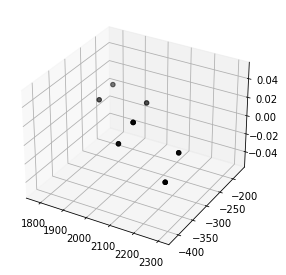

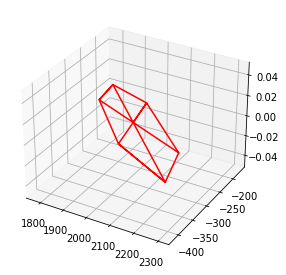

In [466]:
fig3 = plt.figure(figsize=(10,10))
ax3 = fig3.add_subplot(1,2,1, projection='3d') 
ax3.scatter(Tranformed_Mat[:,0], Tranformed_Mat[:,1], color='black' )          
plt.show()

fig4 = plt.figure(figsize=(10,10))
ax4 = fig4.add_subplot(1,2,2, projection='3d')
ax4.plot(Tranformed_Mat[:,0], Tranformed_Mat[:,1], color='r')         
plt.show()  